In [3106]:
#import regular packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3107]:
#Read csv file as dataframe
df = pd.read_csv('train.csv')

In [3108]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3110]:
# Create new column that gives length of text
df = df.loc[:,['text','target']]
df['length'] = df['text'].apply(len)
df.head()

,text,target,length
0,Our Deeds are the Reason of this #earthquake M...,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are ...,1,133
3,"13,000 people receive #wildfires evacuation or...",1,65
4,Just got sent this photo from Ruby #Alaska as ...,1,88


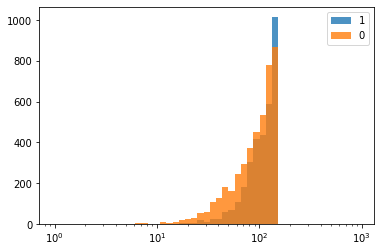

In [3111]:
# Show overlap of length distributions grouped by target
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['target']==1]['length'],bins=bins,alpha=0.8)
plt.hist(df[df['target']==0]['length'],bins=bins,alpha=0.8)
plt.legend(('1','0'))
plt.show()

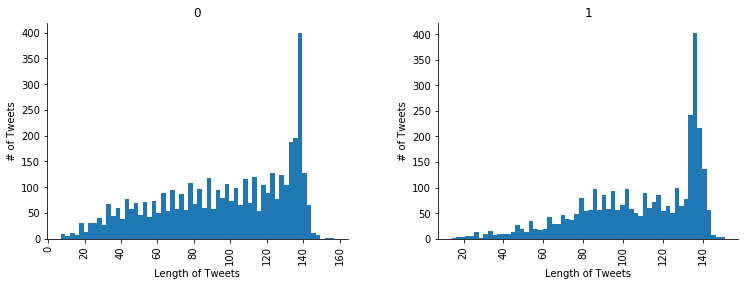

In [3112]:
# Show histogram of length, one for each target value
ax = df.hist(column='length',by='target',bins=60,figsize=(12,4))
for i in ax:
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.set_xlabel('Length of Tweets')
    i.set_ylabel('# of Tweets')

In [3113]:
import re

In [3114]:
# Add new column that gives total number of punctuation in tweet
df['punc'] = df['text'].apply(lambda x: len(re.findall('[.?!,:/=><-]',x)))
df.head()

,text,target,length,punc
0,Our Deeds are the Reason of this #earthquake M...,1,69,0
1,Forest fire near La Ronge Sask. Canada,1,38,1
2,All residents asked to 'shelter in place' are ...,1,133,1
3,"13,000 people receive #wildfires evacuation or...",1,65,1
4,Just got sent this photo from Ruby #Alaska as ...,1,88,0


In [3115]:
df[df['target'] == 0].head()


,text,target,length,punc
15,What's up man?,0,14,1
16,I love fruits,0,13,0
17,Summer is lovely,0,16,0
18,My car is so fast,0,17,0
19,What a goooooooaaaaaal!!!!!!,0,28,6


In [3123]:
# Using reguar expression to get rid of urls
df['text'] = df['text'].apply(lambda x: re.sub('http://[.\w]+/[.\w]*','',x))

In [3124]:
df['exclaim'] = df['text'].apply(lambda x: len(re.findall('[!]',x)))

In [3125]:
df.head()

,text,target,length,punc,exclaim
0,Our Deeds are the Reason of this #earthquake M...,1,69,0,0
1,Forest fire near La Ronge Sask. Canada,1,38,1,0
2,All residents asked to 'shelter in place' are ...,1,133,1,0
3,"13,000 people receive #wildfires evacuation or...",1,65,1,0
4,Just got sent this photo from Ruby #Alaska as ...,1,88,0,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2cad3780>,
      dtype=object)

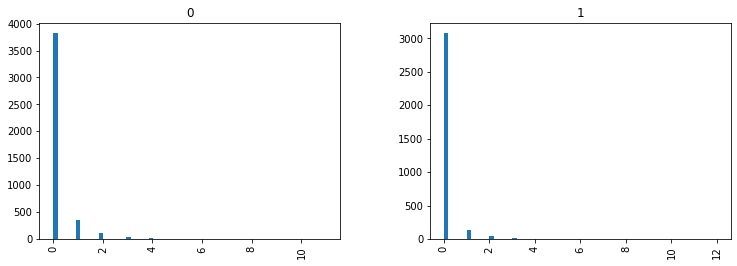

In [3126]:
df.hist(column='exclaim',by='target',bins=60,figsize=(12,4))

In [3127]:
df[df['target'] == 0].head()

,text,target,length,punc,exclaim
15,What's up man?,0,14,1,0
16,I love fruits,0,13,0,0
17,Summer is lovely,0,16,0,0
18,My car is so fast,0,17,0,0
19,What a goooooooaaaaaal!!!!!!,0,28,6,6


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a7e295240>,
      dtype=object)

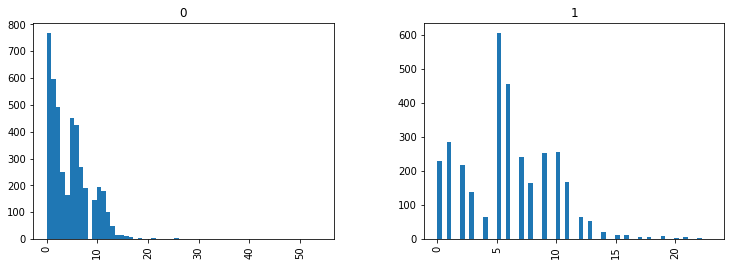

In [3128]:
df.hist(column='punc',by='target',bins=60,figsize=(12,4))

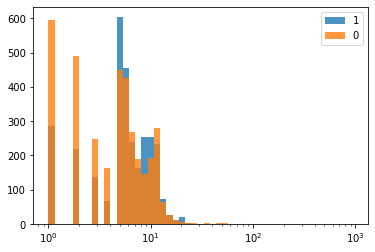

In [3129]:
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['target']==1]['punc'],bins=bins,alpha=0.8)
plt.hist(df[df['target']==0]['punc'],bins=bins,alpha=0.8)
plt.legend(('1','0'))
plt.show()

In [3130]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from nltk import word_tokenize
from wordcloud import WordCloud, STOPWORDS

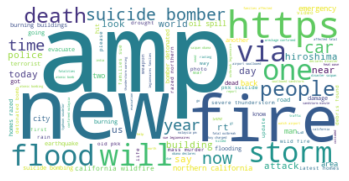

In [3131]:
#Create a WordCloud that shows most common words when a tweet is classified as a disaster tweet.
cop = df.copy()
cop = cop[cop.target == 1]

tokens = [word_tokenize(item) for item in cop.text]
abc=[[word.lower() for word in lword if word.isalpha()] for lword in tokens]
abc = [' '.join(wordl) for wordl in abc]
abc = ' '.join(abc)

cloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(abc)
plt.imshow(cloud,interpolation='bilinear')
plt.axis('off')
plt.show()


In [3133]:
cop = df.copy()
cop = cop[cop.target == 1]

tokens = [word_tokenize(item) for item in cop.text]
abc=[[word.lower() for word in lword if word.isalpha()] for lword in tokens]
# abc = [' '.join(wordl) for wordl in abc]
# abc = ' '.join(abc)
# abc

In [3134]:
cop2 = df.copy()
cop2 = cop2[(cop2.target == 0)]
# tokens = [word_tokenize(item) for item in cop.text]
# abc=[[word.lower() for word in lword if word.isalpha()] for lword in tokens]
# abc = [' '.join(wordl) for wordl in abc]
# abc = ' '.join(abc)

# cloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(abc)
# plt.imshow(cloud,interpolation='bilinear')
# plt.axis('off')
# plt.show()

In [3135]:
'really' in STOPWORDS

False

In [3136]:
r = [word_tokenize(word) for word in df.text]
print('Orig tok: ', r[0])

Orig tok:  ['Our', 'Deeds', 'are', 'the', 'Reason', 'of', 'this', '#', 'earthquake', 'May', 'ALLAH', 'Forgive', 'us', 'all']


In [3137]:
s = [[word for word in item if word.isalpha()] for item in r]

In [3139]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

# Build the vectorizer
vect = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1, 2), max_features=200).fit(df.text)

In [3140]:
X = vect.transform(df.text)

In [3141]:
rt = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

In [3142]:
print(rt.head())

    08   10   11   15  2015   70  accident  amp  area  army ...   world  \
0  0.0  0.0  0.0  0.0   0.0  0.0       0.0  0.0   0.0   0.0 ...     0.0   
1  0.0  0.0  0.0  0.0   0.0  0.0       0.0  0.0   0.0   0.0 ...     0.0   
2  0.0  0.0  0.0  0.0   0.0  0.0       0.0  0.0   0.0   0.0 ...     0.0   
3  0.0  0.0  0.0  0.0   0.0  0.0       0.0  0.0   0.0   0.0 ...     0.0   
4  0.0  0.0  0.0  0.0   0.0  0.0       0.0  0.0   0.0   0.0 ...     0.0   

   wounded  wreck  year  years  youtube  youtube video   û_   ûª  ûªs  
0      0.0    0.0   0.0    0.0      0.0            0.0  0.0  0.0  0.0  
1      0.0    0.0   0.0    0.0      0.0            0.0  0.0  0.0  0.0  
2      0.0    0.0   0.0    0.0      0.0            0.0  0.0  0.0  0.0  
3      0.0    0.0   0.0    0.0      0.0            0.0  0.0  0.0  0.0  
4      0.0    0.0   0.0    0.0      0.0            0.0  0.0  0.0  0.0  

[5 rows x 200 columns]


In [3143]:
rt['target'] = df['target']

In [3144]:
print(rt.head())

    08   10   11   15  2015   70  accident  amp  area  army   ...    wounded  \
0  0.0  0.0  0.0  0.0   0.0  0.0       0.0  0.0   0.0   0.0   ...        0.0   
1  0.0  0.0  0.0  0.0   0.0  0.0       0.0  0.0   0.0   0.0   ...        0.0   
2  0.0  0.0  0.0  0.0   0.0  0.0       0.0  0.0   0.0   0.0   ...        0.0   
3  0.0  0.0  0.0  0.0   0.0  0.0       0.0  0.0   0.0   0.0   ...        0.0   
4  0.0  0.0  0.0  0.0   0.0  0.0       0.0  0.0   0.0   0.0   ...        0.0   

   wreck  year  years  youtube  youtube video   û_   ûª  ûªs  target  
0    0.0   0.0    0.0      0.0            0.0  0.0  0.0  0.0       1  
1    0.0   0.0    0.0      0.0            0.0  0.0  0.0  0.0       1  
2    0.0   0.0    0.0      0.0            0.0  0.0  0.0  0.0       1  
3    0.0   0.0    0.0      0.0            0.0  0.0  0.0  0.0       1  
4    0.0   0.0    0.0      0.0            0.0  0.0  0.0  0.0       1  

[5 rows x 201 columns]


In [3145]:
from nltk.corpus import stopwords
new = df[df.target == 0]
ab = [word_tokenize(word) for word in new.text if word not in ENGLISH_STOP_WORDS]
ab = [[word.lower() for word in lword if word.isalpha()] for lword in ab]
s = ' '.join([' '.join(i) for i in ab])

In [3146]:
from textblob import TextBlob
blob = TextBlob(' '.join(ab[3]))
blob.sentiment

Sentiment(polarity=0.2, subjectivity=0.6)

In [3147]:
from wordcloud import WordCloud

In [3148]:
g = WordCloud(background_color='white',stopwords=STOPWORDS).generate(s)

(-0.5, 399.5, 199.5, -0.5)

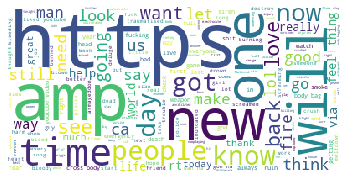

In [3149]:
plt.imshow(g)
plt.axis('off')

In [3150]:
rt.head()

,08,10,11,15,2015,70,accident,amp,area,army,...,wounded,wreck,year,years,youtube,youtube video,û_,ûª,ûªs,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [3151]:
y = rt.target
X = rt.drop('target',axis=1)

In [3152]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [3153]:
#Split,train,predict
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=42)
log_reg = MultinomialNB().fit(X_train,y_train)
y_predicted = log_reg.predict(X_test)

In [3154]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [3155]:
print('Accuracy on the test set: ', accuracy_score(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy on the test set:  0.7406434668417596
[[0.50361129 0.07025607]
 [0.18910046 0.23703217]]


In [3156]:
df['text'].describe()

count                                                  7613
unique                                                 7008
top       Watch This Airport Get Swallowed Up By A Sands...
freq                                                     24
Name: text, dtype: object

In [3157]:
# Groups variables by target variable
df.groupby('target').describe()

exclaim                                                length  \
         count      mean       std  min  25%  50%  75%   max   count   
target                                                                 
0       4342.0  0.194150  0.673542  0.0  0.0  0.0  0.0  11.0  4342.0   
1       3271.0  0.100887  0.534643  0.0  0.0  0.0  0.0  12.0  3271.0   

                    ...                   punc                                \
              mean  ...     75%    max   count      mean       std  min  25%   
target              ...                                                        
0        95.706817  ...   130.0  157.0  4342.0  4.531322  4.271678  0.0  1.0   
1       108.113421  ...   136.0  151.0  3271.0  5.999389  3.798277  0.0  3.0   

                        
        50%  75%   max  
target                  
0       4.0  7.0  54.0  
1       6.0  9.0  23.0  

[2 rows x 24 columns]

In [3158]:
df['length'] = df['text'].apply(len)

In [3159]:
df.head()

,text,target,length,punc,exclaim
0,Our Deeds are the Reason of this #earthquake M...,1,69,0,0
1,Forest fire near La Ronge Sask. Canada,1,38,1,0
2,All residents asked to 'shelter in place' are ...,1,133,1,0
3,"13,000 people receive #wildfires evacuation or...",1,65,1,0
4,Just got sent this photo from Ruby #Alaska as ...,1,88,0,0


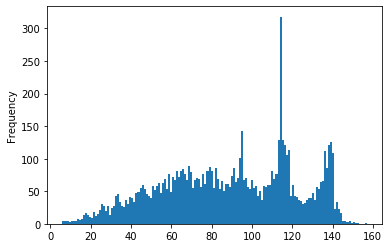

In [3160]:
df['length'].plot.hist(bins=150)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a5c00b0f0>,
      dtype=object)

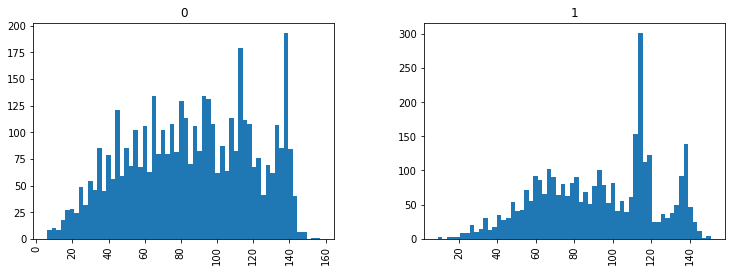

In [3161]:
df.hist(column='length',by='target',bins=60,figsize=(12,4))

In [3164]:
vect = CountVectorizer(max_features=1000,ngram_range=(2,2),max_df=500)
vect.fit(df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=500, max_features=1000, min_df=1,
        ngram_range=(2, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [3165]:
X_review = vect.transform(df.text)

In [3166]:
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())

In [3167]:
X_df.head()

,00 pm,04 01,05 at,08 05,08 06,11 year,12000 nigerian,130 specially,15 in,16yr old,...,your phone,yours stand,youth saved,youtube playlist,youtube video,û_ https,ûªs stock,ûªt let,ûªve been,ûïwhen saw
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3168]:
df.head(15)

,text,target,length,punc,exclaim
0,Our Deeds are the Reason of this #earthquake M...,1,69,0,0
1,Forest fire near La Ronge Sask. Canada,1,38,1,0
2,All residents asked to 'shelter in place' are ...,1,133,1,0
3,"13,000 people receive #wildfires evacuation or...",1,65,1,0
4,Just got sent this photo from Ruby #Alaska as ...,1,88,0,0
5,#RockyFire Update => California Hwy. 20 closed...,1,110,4,0
6,#flood #disaster Heavy rain causes flash flood...,1,95,1,0
7,I'm on top of the hill and I can see a fire in...,1,59,3,0
8,There's an emergency evacuation happening now ...,1,79,0,0
9,I'm afraid that the tornado is coming to our a...,1,52,3,0


In [3169]:
from textblob import TextBlob

In [3170]:
for i in df.text[:15]:
    a = TextBlob(i)
    print(a.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.1, subjectivity=0.4)
Sentiment(polarity=-0.018750000000000003, subjectivity=0.3875)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.1125, subjectivity=0.2375)
Sentiment(polarity=-0.2, subjectivity=0.5)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.6, subjectivity=0.9)
Sentiment(polarity=0.1, subjectivity=1.0)
Sentiment(polarity=0.11212121212121212, subjectivity=0.26666666666666666)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)


In [3171]:
df.head(13)

,text,target,length,punc,exclaim
0,Our Deeds are the Reason of this #earthquake M...,1,69,0,0
1,Forest fire near La Ronge Sask. Canada,1,38,1,0
2,All residents asked to 'shelter in place' are ...,1,133,1,0
3,"13,000 people receive #wildfires evacuation or...",1,65,1,0
4,Just got sent this photo from Ruby #Alaska as ...,1,88,0,0
5,#RockyFire Update => California Hwy. 20 closed...,1,110,4,0
6,#flood #disaster Heavy rain causes flash flood...,1,95,1,0
7,I'm on top of the hill and I can see a fire in...,1,59,3,0
8,There's an emergency evacuation happening now ...,1,79,0,0
9,I'm afraid that the tornado is coming to our a...,1,52,3,0


In [3172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [3173]:
# Choose feature and target variables
X = df['text']
y = df['target']

In [3174]:
#Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.33,random_state=42)

In [3175]:
# Initialize a CountVectorizer object
count_vect = CountVectorizer()

In [3176]:
X_train_counts = count_vect.fit_transform(X_train)

In [3177]:
vectorizer = TfidfVectorizer()

In [3178]:
X_train_tfidf = vectorizer.fit_transform(X_train)

In [3179]:
#clf = LinearSVC()
#clf = MultinomialNB()
clf = LogisticRegression()

In [3180]:
clf.fit(X_train_tfidf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [3181]:
from sklearn.pipeline import Pipeline

In [3182]:
#pipeline = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])
# Build pipeline to transform test data, the same way we transformed the training data
pipeline = Pipeline([('tfidf',TfidfVectorizer()),('clf',LogisticRegression())])

In [3183]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [3184]:
pred = pipeline.predict(X_test)
pred

/anaconda3/lib/python3.6/site-packages/IPython/core/displayhook.py:271: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


array([0, 0, 1, ..., 0, 0, 0])

In [3185]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [3186]:
print(confusion_matrix(y_test,pred))

[[1301  145]
 [ 332  735]]


In [3187]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.80      0.90      0.85      1446
          1       0.84      0.69      0.76      1067

avg / total       0.81      0.81      0.81      2513



In [3188]:
accuracy_score(y_test,pred)

0.8101870274572225

In [3189]:
df.isnull().sum()

text       0
target     0
length     0
punc       0
exclaim    0
dtype: int64

In [3190]:
df.head(50)

,text,target,length,punc,exclaim
0,Our Deeds are the Reason of this #earthquake M...,1,69,0,0
1,Forest fire near La Ronge Sask. Canada,1,38,1,0
2,All residents asked to 'shelter in place' are ...,1,133,1,0
3,"13,000 people receive #wildfires evacuation or...",1,65,1,0
4,Just got sent this photo from Ruby #Alaska as ...,1,88,0,0
5,#RockyFire Update => California Hwy. 20 closed...,1,110,4,0
6,#flood #disaster Heavy rain causes flash flood...,1,95,1,0
7,I'm on top of the hill and I can see a fire in...,1,59,3,0
8,There's an emergency evacuation happening now ...,1,79,0,0
9,I'm afraid that the tornado is coming to our a...,1,52,3,0


In [3191]:
len(df)

7613

In [3192]:
from sklearn.feature_extraction.text import CountVectorizer,ENGLISH_STOP_WORDS

In [3193]:
cv = CountVectorizer(max_df=.9,min_df=2,stop_words='english')

In [3194]:
dtm = cv.fit_transform(df['text'])

In [3195]:
dtm

<7613x6266 sparse matrix of type '<class 'numpy.int64'>'
	with 55295 stored elements in Compressed Sparse Row format>

In [3196]:
from sklearn.decomposition import LatentDirichletAllocation

In [3197]:
LDA = LatentDirichletAllocation(n_components=100, random_state=42)

In [3198]:
LDA.fit(dtm)

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=100, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=42,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [3199]:
len(cv.get_feature_names())

6266

In [3200]:
import random

random_word_id = random.randint(0,6266)

cv.get_feature_names()[random_word_id]

'modiministry'

In [3201]:
LDA.components_

array([[0.01000007, 0.01000007, 0.01000007, ..., 0.01000007, 0.01000007,
        0.01000007],
       [0.01000006, 0.01000007, 0.01000007, ..., 0.01000008, 0.01000009,
        0.01000006],
       [0.01000006, 0.01000007, 0.01000006, ..., 0.01000006, 0.01000006,
        0.01000006],
       ...,
       [0.01000008, 0.01000006, 0.01000008, ..., 0.01000122, 0.01000005,
        0.01000012],
       [0.01000007, 0.01000007, 0.01000007, ..., 0.01000014, 0.01000007,
        0.01000005],
       [0.01000007, 0.01000005, 0.01000007, ..., 0.01000006, 0.01000006,
        0.01000007]])

In [3202]:
single_topic = LDA.components_[0]

In [3203]:
single_topic.argsort()[-10:]

array([3406, 4538,  979, 1193, 5703, 3471, 4673, 1052, 2962, 1554])

In [3204]:
top_ten_words = single_topic.argsort()[-20:]

In [3205]:
for index in top_ten_words:
    print(cv.get_feature_names()[index])

feinstein
washingtonpost
designed
boston
olap
cue
sites
2009
engulfed
prophetmuhammad
madinah
reduce
calling
civilian
tribal
massive
ridge
casualties
islam
deaths


In [3206]:
for i, topic in enumerate(LDA.components_):
    print(f"THE TOP 15 WORDS FOR TOPIC #{i}")
    print([cv.get_feature_names()[index] for index in topic.argsort()[-15:]])
    print('\n')
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['cue', 'sites', '2009', 'engulfed', 'prophetmuhammad', 'madinah', 'reduce', 'calling', 'civilian', 'tribal', 'massive', 'ridge', 'casualties', 'islam', 'deaths']




THE TOP 15 WORDS FOR TOPIC #1
['mean', 'department', 'dad', 'finally', 'hours', 'drown', 'past', 'thank', 'devastation', 'horrible', 'trouble', 'red', 'read', 'god', 'want']




THE TOP 15 WORDS FOR TOPIC #2
['outlook', 'municipal', 'main', 'currently', 'attacks', 'ii', 'training', 'friday', 'el', 'hard', 'listen', 'happy', 'effect', 'hurricane', 'city']




THE TOP 15 WORDS FOR TOPIC #3
['sending', 'prefer', 'poverty', 'understanding', 'medical', 'tornadoes', 'bout', 'computer', 'text', 'tho', 'weekend', 'takes', 'lava', 'ok', 'need']




THE TOP 15 WORDS FOR TOPIC #4
['ak', 'chicken', 'denmark', 'projects', 'particularly', 'threw', 'sisters', 'lip', 'highly', 'nurse', 'providence', 'dk', 'investigation', 'married', 'eyewitness']




THE TOP 15 WORDS FOR TOPIC #5
['unsafe', 'afghan', 'decide

['shutdown', 'rays', 'politifiact', 'hysteria', 'microphone', 'indifference', 'tflbusalerts', 'mkx', 'stressed', 'melt', 'activates', 'grey', 'abstorm', 'yyc', 'fatalities']




THE TOP 15 WORDS FOR TOPIC #48
['aba', 'public', 'entire', 'team', 'health', 'building', 'trying', 'leave', 'market', 'security', 'officer', 'traumatised', 'breaking', 'terrorist', 'news']




THE TOP 15 WORDS FOR TOPIC #49
['proper', 'equally', 'vault', 'veteran', 'ian_hellfire', 'vet', 'present', 'example', 'sub', 'league', 'access', 'veterans', 'releases', 'message', 'level']




THE TOP 15 WORDS FOR TOPIC #50
['wanting', '2pcs', 'battery', 'sat', 'curved', '300w', '53inch', 'shop', 'fog', 'students', 'month', 'cree', 'glad', 'lamp', 'legionnaires']




THE TOP 15 WORDS FOR TOPIC #51
['fyi', 'np', 'shelby', 'solution', 'drop', 'wx', 'rains', 'knee', 'arrived', 'delivers', 'myanmar', 'cdt', 'wounds', 'damage', 'flood']




THE TOP 15 WORDS FOR TOPIC #52
['displace', 'odds', 'excited', 'washed', 'clouds', 'alb

['blue', '100', 'poor', '13', 'fan', 'women', 'violent', 'hope', 'shit', 'military', 'japan', 'army', 'way', 'watch', 'war']




THE TOP 15 WORDS FOR TOPIC #93
['copycats', 'keratin', 'riyadh', 'exciting', 'tha', 'neck', 'scifi', '69', 'shaking', 'jr', 'spirits', 'pls', 'uses', 'diving', 'drowning']




THE TOP 15 WORDS FOR TOPIC #94
['park', 'piece', 'ago', 'river', 'crashed', 'national', 'left', 'services', 'change', 'stop', 'times', 'trauma', 'little', 'wild', 'forest']




THE TOP 15 WORDS FOR TOPIC #95
['card', 'unit', 'dramatic', 'rì', 'damaged', 'union', 'roosevelt', 'sense', 'captures', 'hand', 'shift', 'houses', 'youth', 'makes', 'long']




THE TOP 15 WORDS FOR TOPIC #96
['involving', 'close', 'occurred', 'reported', 'eye', 'chance', 'huge', 'space', '50', 'use', 'china', 'cause', 'near', 'sinking', 'fatal']




THE TOP 15 WORDS FOR TOPIC #97
['agree', 'teen', 'united', '12', 'called', 'feeling', 'country', 'danger', 'india', 'soon', 'airport', 'sirens', 'tragedy', 'plan', 'h

In [3207]:
topic_results = LDA.transform(dtm)

In [3208]:
topic_results[0].argmax()

86

In [3209]:
df['Topic'] = topic_results.argmax(axis=1)

In [3210]:
df.head(50)

,text,target,length,punc,exclaim,Topic
0,Our Deeds are the Reason of this #earthquake M...,1,69,0,0,86
1,Forest fire near La Ronge Sask. Canada,1,38,1,0,71
2,All residents asked to 'shelter in place' are ...,1,133,1,0,77
3,"13,000 people receive #wildfires evacuation or...",1,65,1,0,92
4,Just got sent this photo from Ruby #Alaska as ...,1,88,0,0,34
5,#RockyFire Update => California Hwy. 20 closed...,1,110,4,0,86
6,#flood #disaster Heavy rain causes flash flood...,1,95,1,0,46
7,I'm on top of the hill and I can see a fire in...,1,59,3,0,86
8,There's an emergency evacuation happening now ...,1,79,0,0,15
9,I'm afraid that the tornado is coming to our a...,1,52,3,0,20


In [3211]:
df['text'][40]

'Check these out:     #nsfw'

In [3212]:
df[df['target'] == 1]['Topic'].value_counts().sort_index()

0      28
1      24
2      33
3      13
4       6
5      13
6      18
7      30
8      13
9     113
10     26
11     34
12      1
13     49
14     22
15     53
16     25
17     14
18     15
19      2
20     35
21     10
22     42
23     55
24     11
25     33
26     99
27     13
28     41
29     16
     ... 
70     70
71     53
72     15
73      9
74     22
75     50
76     81
77     10
78     31
79     44
80     51
81    114
82     44
83     17
84     20
85    107
86     36
87     37
88     26
89      2
90     22
91     16
92     73
93      4
94     38
95     32
96     34
97     62
98     55
99     12
Name: Topic, Length: 100, dtype: int64

In [3213]:
df[df['target'] == 0]['Topic'].value_counts().sort_index()

0      37
1      63
2      36
3      43
4      16
5      39
6      10
7      50
8       4
9      37
10     17
11     47
12      6
13     18
14     41
15     67
16      4
17     46
18     52
19      1
20     70
21     19
22    159
23     68
24     29
25     15
26     52
27     16
28     47
29     52
     ... 
70     40
71     59
72     52
73     39
74     59
75     51
76     66
77     12
78     61
79      9
80     40
81     91
82     21
83     80
84     32
85     16
86     25
87     74
88     59
89     13
90      8
91     35
92     86
93     20
94     60
95     23
96     38
97    182
98    163
99     14
Name: Topic, Length: 99, dtype: int64

In [3214]:
df.head()

,text,target,length,punc,exclaim,Topic
0,Our Deeds are the Reason of this #earthquake M...,1,69,0,0,86
1,Forest fire near La Ronge Sask. Canada,1,38,1,0,71
2,All residents asked to 'shelter in place' are ...,1,133,1,0,77
3,"13,000 people receive #wildfires evacuation or...",1,65,1,0,92
4,Just got sent this photo from Ruby #Alaska as ...,1,88,0,0,34


In [3215]:
X = df['Topic']
X = pd.DataFrame(X)

,Topic
0,86
1,71
2,77
3,92
4,34
5,86
6,46
7,86
8,15
9,20


In [3216]:
y = df['target']

In [3217]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [3218]:
lr = LogisticRegression()

In [3219]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [3220]:
pred = lr.predict(X_test)

In [3221]:
accuracy_score(y_test,pred)

0.5770577933450087

In [3222]:
df.head()

,text,target,length,punc,exclaim,Topic
0,Our Deeds are the Reason of this #earthquake M...,1,69,0,0,86
1,Forest fire near La Ronge Sask. Canada,1,38,1,0,71
2,All residents asked to 'shelter in place' are ...,1,133,1,0,77
3,"13,000 people receive #wildfires evacuation or...",1,65,1,0,92
4,Just got sent this photo from Ruby #Alaska as ...,1,88,0,0,34


In [3223]:
import re
def remove_at(text, pattern):
    r = re.findall(pattern,text)
    for i in r:
        text = re.sub(i,'', text)
    return text

In [3224]:
df['text2'] = np.vectorize(remove_at)(df['text'], "@[\w]*")

In [3225]:
df.head(50)

,text,target,length,punc,exclaim,Topic,text2
0,Our Deeds are the Reason of this #earthquake M...,1,69,0,0,86,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada,1,38,1,0,71,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...,1,133,1,0,77,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or...",1,65,1,0,92,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...,1,88,0,0,34,Just got sent this photo from Ruby #Alaska as ...
5,#RockyFire Update => California Hwy. 20 closed...,1,110,4,0,86,#RockyFire Update => California Hwy. 20 closed...
6,#flood #disaster Heavy rain causes flash flood...,1,95,1,0,46,#flood #disaster Heavy rain causes flash flood...
7,I'm on top of the hill and I can see a fire in...,1,59,3,0,86,I'm on top of the hill and I can see a fire in...
8,There's an emergency evacuation happening now ...,1,79,0,0,15,There's an emergency evacuation happening now ...
9,I'm afraid that the tornado is coming to our a...,1,52,3,0,20,I'm afraid that the tornado is coming to our a...


In [3226]:
lem = WordNetLemmatizer()

df['text2'] = df['text2'].str.replace("[^a-zA-Z#']"," ")
df['text2'] = df['text2'].apply(lambda x: re.sub('http://[.\w]+/[.\w]*','',x))
df['text2'] = df['text2'].apply(lambda x: re.sub('amp','',x))
df['text2'] = df['text2'].apply(lambda x: re.sub('https://[.\w]+/[.\w]*','',x))
# df['text2'] = df['text2'].apply(lambda x: re.sub('news','',x))
# df['text2'] = df['text2'].apply(lambda x: re.sub('prebreak','',x))
df['text2'] = df['text2'].apply(lambda x: re.sub('hot','',x))
df['text2'] = df['text2'].apply(lambda x: re.sub('http','',x))
df['text2'] = df['text2'].apply(lambda x: re.sub(' ha ','',x))
df['text2'] = df['text2'].apply(lambda x: re.sub(' wa ','',x))
#df['text2'] = df['text2'].apply(lambda x: re.sub(' just ','',x))
#df['text2'] = df['text2'].apply(lambda x: re.sub(' new ','',x))
# df['text2'] = df['text2'].apply(lambda x: re.sub('wa ','',x))
# df['text2'] = df['text2'].apply(lambda x: re.sub('ha ','',x))

In [3227]:
re.sub(r'wa','','want')

'nt'

In [3228]:
# for i in df['text2']:
#     print(i,re.findall(' wa ',i))

In [3229]:
df.head(50)

,text,target,length,punc,exclaim,Topic,text2
0,Our Deeds are the Reason of this #earthquake M...,1,69,0,0,86,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada,1,38,1,0,71,Forest fire near La Ronge Sask Canada
2,All residents asked to 'shelter in place' are ...,1,133,1,0,77,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or...",1,65,1,0,92,people receive #wildfires evacuation or...
4,Just got sent this photo from Ruby #Alaska as ...,1,88,0,0,34,Just got sent this po from Ruby #Alaska as smo...
5,#RockyFire Update => California Hwy. 20 closed...,1,110,4,0,86,#RockyFire Update California Hwy closed...
6,#flood #disaster Heavy rain causes flash flood...,1,95,1,0,46,#flood #disaster Heavy rain causes flash flood...
7,I'm on top of the hill and I can see a fire in...,1,59,3,0,86,I'm on top of the hill and I can see a fire in...
8,There's an emergency evacuation happening now ...,1,79,0,0,15,There's an emergency evacuation happening now ...
9,I'm afraid that the tornado is coming to our a...,1,52,3,0,20,I'm afraid that the tornado is coming to our a...


In [3230]:
token_text = df['text2'].apply(lambda x: x.split())

In [3231]:
token_text.head(35)

0     [Our, Deeds, are, the, Reason, of, this, #eart...
1         [Forest, fire, near, La, Ronge, Sask, Canada]
2     [All, residents, asked, to, 'shelter, in, plac...
3     [people, receive, #wildfires, evacuation, orde...
4     [Just, got, sent, this, po, from, Ruby, #Alask...
5     [#RockyFire, Update, California, Hwy, closed, ...
6     [#flood, #disaster, Heavy, rain, causes, flash...
7     [I'm, on, top, of, the, hill, and, I, can, see...
8     [There's, an, emergency, evacuation, happening...
9     [I'm, afraid, that, the, tornado, is, coming, ...
10    [Three, people, died, from, the, heat, wave, s...
11    [Haha, South, Ta, is, getting, flooded, hah, W...
12    [#raining, #flooding, #Florida, #TaBay, #Ta, o...
13      [#Flood, in, Bago, Myanmar, #We, arrived, Bago]
14    [Damage, to, school, bus, on, in, multi, car, ...
15                                    [What's, up, man]
16                                    [I, love, fruits]
17                                 [Summer, is, 

In [3232]:
import nltk
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/NeilCollegeWork/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/NeilCollegeWork/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3233]:
#token_text = token_text.apply(lambda x: [i.lower() for i in x if not i.lower() in stopwords.words()])
#token_text = token_text.apply(lambda x: [i.lower() for i in x if not i.lower() in ENGLISH_STOP_WORDS])
token_text = token_text.apply(lambda x: [lem.lemmatize(i.lower()) for i in x])
#token_text = token_text.apply(lambda x: [i.lower() for i in x])

In [3234]:
#token_text.apply(lambda x: [lem.lemmatize(i) for i in x])


In [3235]:
token_text.head(50)

0     [our, deed, are, the, reason, of, this, #earth...
1         [forest, fire, near, la, ronge, sask, canada]
2     [all, resident, asked, to, 'shelter, in, place...
3     [people, receive, #wildfires, evacuation, orde...
4     [just, got, sent, this, po, from, ruby, #alask...
5     [#rockyfire, update, california, hwy, closed, ...
6     [#flood, #disaster, heavy, rain, cause, flash,...
7     [i'm, on, top, of, the, hill, and, i, can, see...
8     [there's, an, emergency, evacuation, happening...
9     [i'm, afraid, that, the, tornado, is, coming, ...
10    [three, people, died, from, the, heat, wave, s...
11    [haha, south, ta, is, getting, flooded, hah, w...
12    [#raining, #flooding, #florida, #tabay, #ta, o...
13      [#flood, in, bago, myanmar, #we, arrived, bago]
14    [damage, to, school, bus, on, in, multi, car, ...
15                                    [what's, up, man]
16                                     [i, love, fruit]
17                                 [summer, is, 

In [3236]:
for i in range(len(token_text)):
    token_text[i] = ' '.join(token_text[i])

df['text2'] = token_text

In [3237]:
df['text2'] = df['text2'].apply(lambda x: re.sub(' ha ','',x))
df['text2'] = df['text2'].apply(lambda x: re.sub(' wa ','',x))
df['text2'] = df['text2'].apply(lambda x: re.sub(' like ','',x))

In [3238]:
# for i in df['text2']:
#     print(i,re.findall('wa ',i))

In [3239]:
df.head(55)

,text,target,length,punc,exclaim,Topic,text2
0,Our Deeds are the Reason of this #earthquake M...,1,69,0,0,86,our deed are the reason of this #earthquake ma...
1,Forest fire near La Ronge Sask. Canada,1,38,1,0,71,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,133,1,0,77,all resident asked to 'shelter in place' are b...
3,"13,000 people receive #wildfires evacuation or...",1,65,1,0,92,people receive #wildfires evacuation order in ...
4,Just got sent this photo from Ruby #Alaska as ...,1,88,0,0,34,just got sent this po from ruby #alaska a smok...
5,#RockyFire Update => California Hwy. 20 closed...,1,110,4,0,86,#rockyfire update california hwy closed in bot...
6,#flood #disaster Heavy rain causes flash flood...,1,95,1,0,46,#flood #disaster heavy rain cause flash floodi...
7,I'm on top of the hill and I can see a fire in...,1,59,3,0,86,i'm on top of the hill and i can see a fire in...
8,There's an emergency evacuation happening now ...,1,79,0,0,15,there's an emergency evacuation happening now ...
9,I'm afraid that the tornado is coming to our a...,1,52,3,0,20,i'm afraid that the tornado is coming to our area


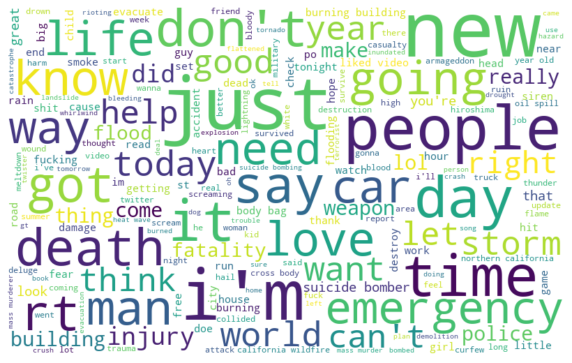

In [3240]:
all_words = ' '.join([text for text in df['text2']])
wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=110,background_color='white',stopwords=ENGLISH_STOP_WORDS).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

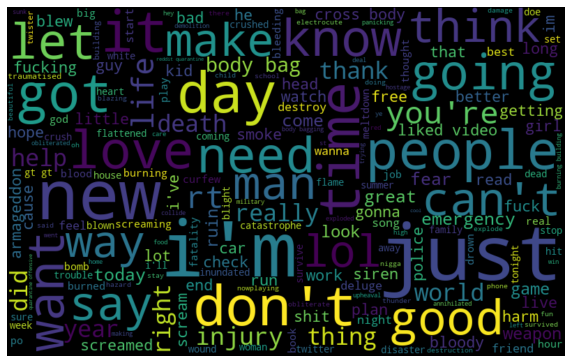

In [3241]:
non = ' '.join([text for text in df['text2'][df['target'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,stopwords=ENGLISH_STOP_WORDS).generate(non)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

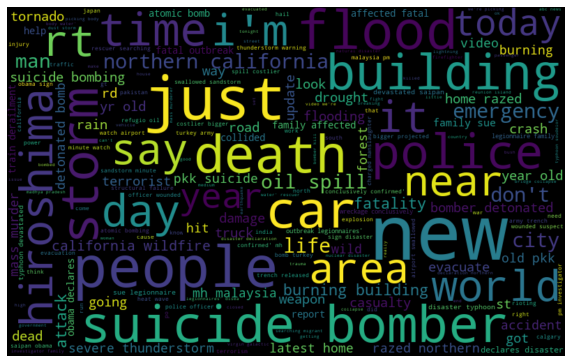

In [3242]:
dis = ' '.join([text for text in df['text2'][df['target'] == 1]])
wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110,stopwords=ENGLISH_STOP_WORDS).generate(dis)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [3243]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [3244]:
HT_regular = hashtag_extract(df['text2'][df['target'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(df['text2'][df['target'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

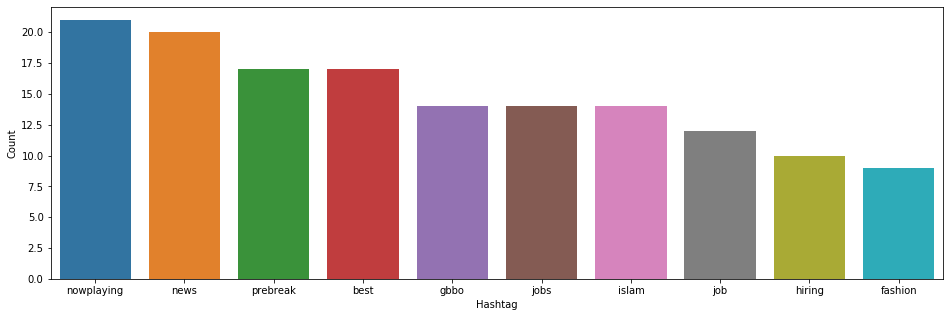

In [3245]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

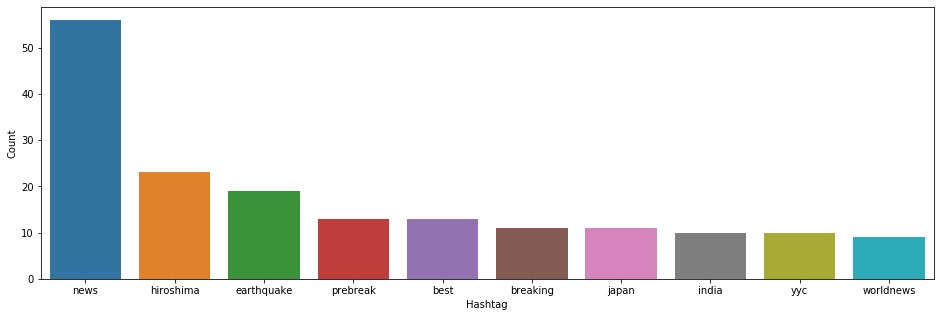

In [3246]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [3247]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df['text2'])
from sklearn.svm import SVC

In [3248]:
X_train,X_test,y_train,y_test = train_test_split(df['text2'], df['target'], random_state=42, test_size=0.3)

In [3249]:
count_vect = CountVectorizer()

In [3250]:
X_train_counts = count_vect.fit_transform(X_train)

In [3251]:
vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words=ENGLISH_STOP_WORDS)

In [3252]:
X_train_tfidf = vectorizer.fit_transform(X_train)
X_train_tfidf

<5329x4337 sparse matrix of type '<class 'numpy.float64'>'
	with 35072 stored elements in Compressed Sparse Row format>

In [3253]:
#clf = LinearSVC()
#clf = MultinomialNB()
clf = LogisticRegression()

In [3254]:
clf.fit(X_train_tfidf, y_train)
#clf.fit(rt, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [3255]:
pipeline = Pipeline([('tfidf',TfidfVectorizer()),('clf',LogisticRegression())])

In [3256]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [3257]:
pred = pipeline.predict(X_test)
pred

array([0, 0, 1, ..., 1, 1, 1])

In [3258]:
print(confusion_matrix(y_test,pred))

[[1198  120]
 [ 287  679]]


In [3259]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.81      0.91      0.85      1318
          1       0.85      0.70      0.77       966

avg / total       0.82      0.82      0.82      2284



In [3260]:
accuracy_score(y_test,pred)

0.8218038528896673

In [3261]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(df.loc[:,'length':'Topic'],y,test_size=.3,random_state=42)

In [3262]:
X_df = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names())
X_df.head()#5329 rows

,aa,ab,aba,abandon,abandoned,abbott,abbswinston,abc,abcnews,ability,...,yr,yugvani,yyc,yycstorm,zayn,zimbabwe,zionism,zionist,zombie,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3263]:
z = X_train2.copy()
z = z.reset_index()
X_df['length'] = z['length']
X_df['punc'] = z['punc']
X_df['exclaim'] = z['exclaim']
X_df['Topic'] = z['Topic']

In [3264]:
X_df.head()

,aa,ab,aba,abandon,abandoned,abbott,abbswinston,abc,abcnews,ability,...,zayn,zimbabwe,zionism,zionist,zombie,zone,length,punc,exclaim,Topic
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,116,10,0,75
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,104,6,0,23
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,63,6,0,9
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,72,1,0,62
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,112,7,0,51


In [3265]:
clf = LogisticRegression()
clf.fit(X_df,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [3266]:
pipeline = Pipeline([('tfidf2',TfidfVectorizer())])
pipeline.fit(X_df,y_train)

Pipeline(memory=None,
     steps=[('tfidf2', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None))])

In [3267]:
X_df.shape

(5329, 4341)

In [3268]:
count_vect2 = CountVectorizer()
X_test_counts = count_vect2.fit_transform(X_test)
vectorizer2 = TfidfVectorizer(max_df=0.90, min_df=2, stop_words=ENGLISH_STOP_WORDS)
X_test_tfidf = vectorizer2.fit_transform(X_test)
X_df_t = pd.DataFrame(X_test_tfidf.toarray(), columns=vectorizer2.get_feature_names())

In [3269]:
z1 = X_test2.copy()
z1 = z1.reset_index()
X_df_t['length'] = z1['length']
X_df_t['punc'] = z1['punc']
X_df_t['exclaim'] = z1['exclaim']
X_df_t['Topic'] = z1['Topic']


In [3270]:
p = pipeline.transform(X_df_t)

In [3271]:
p.shape

(2394, 4341)

In [3272]:
vectorizer2.get_feature_names().append('length')

In [3273]:
len(vectorizer2.get_feature_names())

2390

In [3274]:
cv = CountVectorizer()
df.head()

,text,target,length,punc,exclaim,Topic,text2
0,Our Deeds are the Reason of this #earthquake M...,1,69,0,0,86,our deed are the reason of this #earthquake ma...
1,Forest fire near La Ronge Sask. Canada,1,38,1,0,71,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,133,1,0,77,all resident asked to 'shelter in place' are b...
3,"13,000 people receive #wildfires evacuation or...",1,65,1,0,92,people receive #wildfires evacuation order in ...
4,Just got sent this photo from Ruby #Alaska as ...,1,88,0,0,34,just got sent this po from ruby #alaska a smok...


In [3275]:
er,er1,tr,tr1 = train_test_split(df.loc[:,'length':'text2'],df['target'],test_size=.3,random_state=41)
tt = count_vect.fit_transform(er)

In [3276]:
vv = TfidfVectorizer(max_df=0.90, min_df=2, stop_words=ENGLISH_STOP_WORDS)

In [3277]:
vv_tfidf = vv.fit_transform(er['text2'])
vv_tfidf

<5329x4358 sparse matrix of type '<class 'numpy.float64'>'
	with 35077 stored elements in Compressed Sparse Row format>

In [3278]:
lr = MultinomialNB()
vv_tf = pd.DataFrame(vv_tfidf.toarray(),columns=vv.get_feature_names())
zeb = vv_tf.copy()
er = er.reset_index()
zeb['length'] = er['length']
zeb['punc'] = er['punc']
zeb['exclaim'] = er['exclaim']
zeb['Topic'] = er['Topic']
lr.fit(zeb, tr)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [3279]:
#pipeline = Pipeline([('tfidf',TfidfVectorizer())])
zeb

,aba,abandon,abandoned,abbott,abbswinston,abc,abe,ability,ablaze,able,...,zionist,zippednews,zipper,zombie,zone,zoumajust,length,punc,exclaim,Topic
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,114,13,0,23
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,20,0,0,15
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,94,8,0,13
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,138,5,0,77
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,114,9,0,21
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,101,5,0,32
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,99,5,0,30
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,69,7,0,47
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,137,3,0,76
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,117,8,0,34


In [3280]:
tfidf2 = TfidfVectorizer()
tfidf2.fit(zeb,tr)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [3281]:
new_tfidf = tfidf2.transform(er1['text2'])
new_tfidf

<2284x4362 sparse matrix of type '<class 'numpy.float64'>'
	with 13805 stored elements in Compressed Sparse Row format>

In [3282]:
yi = pd.DataFrame(new_tfidf.toarray())
er1 = er1.reset_index()
yi[4358] = er1['length']
yi[4359] = er1['punc']
yi[4360] = er1['exclaim']
yi[4361] = er1['Topic']

In [3283]:
yi.columns = zeb.columns

In [3284]:
yi.head()

,aba,abandon,abandoned,abbott,abbswinston,abc,abe,ability,ablaze,able,...,zionist,zippednews,zipper,zombie,zone,zoumajust,length,punc,exclaim,Topic
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,65,9,0,17
1,0.0,0.0,0.377964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,116,5,0,74
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,102,8,0,75
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,99,5,0,36
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,119,6,0,47


In [3285]:
prede = lr.predict(yi)
prede

array([1, 1, 0, ..., 0, 1, 1])

In [3286]:
print(confusion_matrix(tr1,prede))

[[942 369]
 [439 534]]


In [3287]:
print(classification_report(tr1,prede))

             precision    recall  f1-score   support

          0       0.68      0.72      0.70      1311
          1       0.59      0.55      0.57       973

avg / total       0.64      0.65      0.64      2284



In [1]:
# Add in the rest of the parameters
def return_weights(vocab, original_vocab, vector, vector_index, top_n):
    zipped = dict(zip(vector[vector_index].indices, vector[vector_index].data))
    
    # Let's transform that zipped dict into a series
    zipped_series = pd.Series({vocab[i]:zipped[i] for i in vector[vector_index].indices})
    
    # Let's sort the series to pull out the top n weighted words
    zipped_index = zipped_series.sort_values(ascending=False)[:top_n].index
    return [original_vocab[i] for i in zipped_index]


In [2]:
def words_to_filter(vocab, original_vocab, vector, top_n):
    filter_list = []
    for i in range(0, vector.shape[0]):
    
        # Here we'll call the return_weights function and extend the list we're creating
        filtered = return_weights(vocab, original_vocab, vector, i, top_n)
        filter_list.extend(filtered)
    # Return the list in a set, so we don't get duplicate word indices
    return set(filter_list)


In [ ]:
text = df['text2']

In [ ]:
tfidf_vec = TfidfVectorizer()

In [ ]:
text_tfidf = tfidf_vec.fit_transform(text)

In [ ]:
vocab = {v:k for k,v in tfidf_vec.vocabulary_.items()}

In [ ]:
filtered_words = words_to_filter(vocab, tfidf_vec.vocabulary_, text_tfidf, 5)

In [ ]:
filtered_text = text_tfidf[:, list(filtered_words)]
filtered_text

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(filtered_text.toarray(), y,random_state=42,test_size=.3)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

In [ ]:
print(confusion_matrix(pred,y_test))

In [ ]:
print(classification_report(pred,y_test))

In [ ]:
print(accuracy_score(y_test,pred))